# DS-SF-34 | 13 | Advanced Metrics | Codealong | Starter Code

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 3

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-13-iris.csv'))

In [3]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

cs = pd.get_dummies(df.Species, prefix = None)
c_Setosa = cs.Setosa
c_Versicolor = cs.Versicolor
c_Virginica = cs.Virginica

model_Setosa = linear_model.LogisticRegression()
model_Setosa.fit(X, c_Setosa)
c_hat_Setosa = model_Setosa.predict(X)

model_Versicolor = linear_model.LogisticRegression()
model_Versicolor.fit(X, c_Versicolor)
c_hat_Versicolor = model_Versicolor.predict(X)

model_Virginica = linear_model.LogisticRegression()
model_Virginica.fit(X, c_Virginica)
c_hat_Virginica = model_Virginica.predict(X)

## Part A | Confusion Matrix

### Review | Classifiers's accuracy

In [6]:
print ("Setosa     classifier's accuracy =", model_Setosa.score(X, c_Setosa))
print ("Versicolor classifier's accuracy =", model_Versicolor.score(X, c_Versicolor))
print ("Virginica  classifier's accuracy =", model_Virginica.score(X, c_Virginica))

Setosa     classifier's accuracy = 1.0
Versicolor classifier's accuracy = 0.7
Virginica  classifier's accuracy = 0.98


### Setosa

In [ ]:
# TODO


### Versicolor

In [ ]:
# TODO

### Virginica

In [ ]:
# TODO

## Part B | ROC/AUC

### Setosa

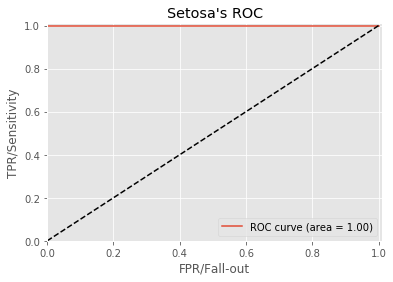

In [7]:
p_hat_Setosa = model_Setosa.predict_proba(X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(c_Setosa, p_hat_Setosa)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Setosa's ROC")
plt.legend(loc = 'lower right')

In [8]:
metrics.roc_auc_score(c_Setosa, c_hat_Setosa)

1.0

### Versicilor

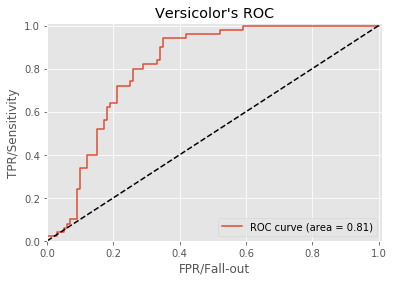

In [9]:
p_hat_Versicolor = model_Versicolor.predict_proba(X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(c_Versicolor, p_hat_Versicolor)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Versicolor's ROC")
plt.legend(loc = 'lower right')

In [10]:
metrics.roc_auc_score(c_Versicolor, c_hat_Versicolor)

0.60000000000000009

### Virginica

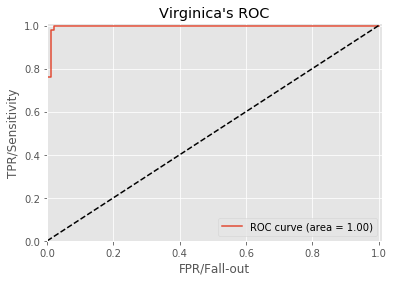

In [11]:
p_hat_Virginica = model_Virginica.predict_proba(X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(c_Virginica, p_hat_Virginica)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("Virginica's ROC")
plt.legend(loc = 'lower right')

In [12]:
metrics.roc_auc_score(c_Virginica, c_hat_Virginica)

0.98499999999999999

## Part C | Prettying up Graphs

In [13]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

(0, 4.5313119700848512)

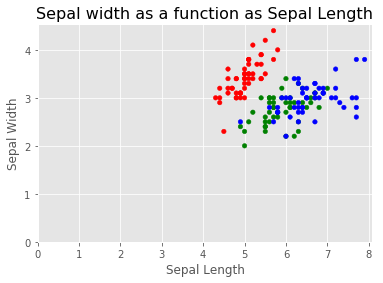

In [14]:
axes = df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color)
axes.set_title('Sepal width as a function as Sepal Length', fontsize = 16)

axes.set_xlabel('Sepal Length')
axes.set_xlim(0)

axes.set_ylabel('Sepal Width')
axes.set_ylim(0)

(0, 4.5262215835466675)

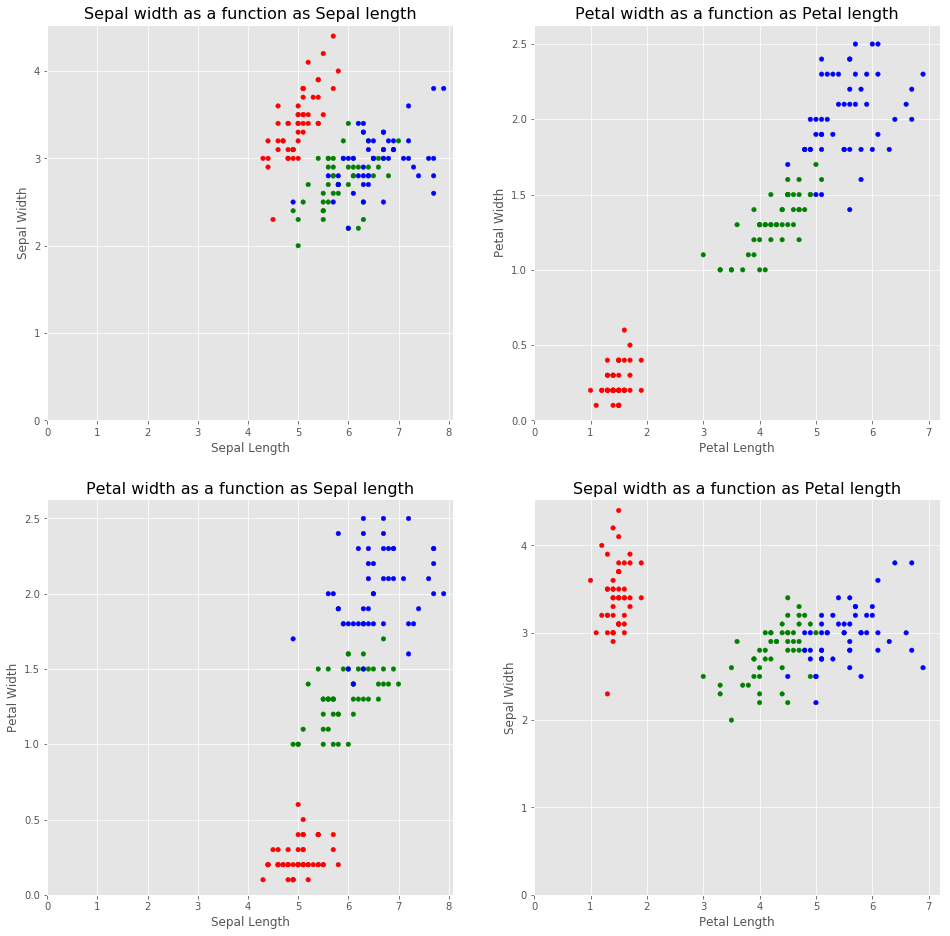

In [15]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 16))

df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color, ax = axes[0, 0])
axes[0, 0].set_title('Sepal width as a function as Sepal length', fontsize = 16)
axes[0, 0].set_xlabel('Sepal Length')
axes[0, 0].set_xlim(0)
axes[0, 0].set_ylabel('Sepal Width')
axes[0, 0].set_ylim(0)

df.plot('PetalLength', 'PetalWidth', kind = 'scatter', c = color, ax = axes[0, 1])
axes[0, 1].set_title('Petal width as a function as Petal length', fontsize = 16)
axes[0, 1].set_xlabel('Petal Length')
axes[0, 1].set_xlim(0)
axes[0, 1].set_ylabel('Petal Width')
axes[0, 1].set_ylim(0)

df.plot('SepalLength', 'PetalWidth', kind = 'scatter', c = color, ax = axes[1, 0])
axes[1, 0].set_title('Petal width as a function as Sepal length', fontsize = 16)
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_xlim(0)
axes[1, 0].set_ylabel('Petal Width')
axes[1, 0].set_ylim(0)

df.plot('PetalLength', 'SepalWidth', kind = 'scatter', c = color, ax = axes[1, 1])
axes[1, 1].set_title('Sepal width as a function as Petal length', fontsize = 16)
axes[1, 1].set_xlabel('Petal Length')
axes[1, 1].set_xlim(0)
axes[1, 1].set_ylabel('Sepal Width')
axes[1, 1].set_ylim(0)